In [40]:
!pip install mplcyberpunk

In [41]:
!pip install gdown


In [69]:
# Import required Libraries
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.io import templates
import gdown
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

In [43]:
# Define the Google Drive URL
url = "https://docs.google.com/spreadsheets/d/1MopYpXWhumf3LE5g2YkrOlLvgV9CVSRa/edit?usp=sharing&ouid=115179633272193518507&rtpof=true&sd=true"

# Extract the file ID from the URL
file_id = url.split('/')[-2]

# Construct the direct download link
download_url = f'https://drive.google.com/uc?id={file_id}'

# Specify the output file name
output_file = 'dataset.xlsx'  # Change this to your desired output file name

# Download the file
gdown.download(download_url, output_file, quiet=False)

print(f'The dataset has been downloaded as {output_file}')

Downloading...
From: https://drive.google.com/uc?id=1MopYpXWhumf3LE5g2YkrOlLvgV9CVSRa
To: c:\Users\wanji\Downloads\dataset.xlsx
100%|██████████| 15.1k/15.1k [00:00<00:00, 133kB/s]

The dataset has been downloaded as dataset.xlsx


In [44]:
# Load the Excel file into a DataFrame and specify that the header is in the second row
df = pd.read_excel('dataset.xlsx', header=1)

# Display the DataFrame with the second row as the header
df

,Year,Unemployment Rate (%),Inflation Rate,Labour Force,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million),population growth,"Population, total",Urban population growth (annual %),Adjusted net national income per capita (annual % growth),Adjusted savings: education expenditure (current US$),"Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,2000,0.0313,9.98,12114213,967838,0.0,982855,2.92,30851606,0.07,-2.81,6.45127e+08,50.46,46.89,3.37,2.89,3.13
1,2001,0.0307,5.73,12601491,1020022,3.8,1020111,3.03,31800343,1.95,-1.09,6.56048e+08,50.03,46.87,3.31,2.84,3.07
2,2002,0.0309,1.97,13103364,1035374,0.5,1025583,3.03,32779823,0.67,-2.34,7.55517e+08,49.61,46.84,3.33,2.86,3.09
3,2003,0.0304,9.81,13606235,1131783,2.9,1055658,2.97,33767122,0.49,-2.44,8.97571e+08,49.18,46.82,3.28,2.82,3.04
4,2004,0.0300,11.80,14125163,1274328,5.1,1109338,2.99,34791836,5.82,2.7,1.01147e+09,48.76,46.79,3.23,2.77,3.00
5,2005,0.0297,9.91,14646884,1415823,5.7,1172784,2.98,35843010,8.3,5.13,1.21569e+09,48.34,46.77,3.20,2.75,2.97
6,2006,0.0294,6.03,15171370,1622565,6.5,1249470,2.97,36925253,14.29,10.94,1.71016e+09,47.91,46.75,3.17,2.73,2.94
7,2007,0.0292,4.27,15697007,1833511,6.9,1336849,2.97,38036793,4.85,1.79,1.97247e+09,47.48,46.72,3.14,2.71,2.92
8,2008,0.0298,15.11,16235546,2107589,1.5,1357262,2.98,39186895,2.18,-0.82,2.06574e+09,47.05,46.71,3.19,2.77,2.98
9,2009,0.0292,10.54,16792371,3275642,2.7,5361462,2.96,40364444,-4.45,-7.24,1.96717e+09,46.62,46.69,3.13,2.72,2.92


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 17 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Year                                                                              23 non-null     int64  
 1   Unemployment Rate (%)                                                             23 non-null     float64
 2   Inflation Rate                                                                    23 non-null     float64
 3   Labour Force                                                                      23 non-null     int64  
 4   Nominal GDP prices (Ksh Million)                                                  23 non-null     int64  
 5   Annual GDP growth (%)                                                             23 non-null     float64
 6   Real

In [46]:
df.describe()

,Year,Unemployment Rate (%),Inflation Rate,Labour Force,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million),population growth,"Population, total","Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
count,23.00000,23.000000,23.000000,2.300000e+01,2.300000e+01,23.000000,2.300000e+01,23.000000,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2011.00000,0.034483,7.613043,1.812661e+07,5.138167e+06,4.260870,5.013512e+06,2.563478,4.245514e+07,45.760435,45.752609,3.669565,3.233913,3.448261
std,6.78233,0.009916,3.251344,3.912670e+06,3.968243e+06,2.246156,3.346256e+06,0.430503,7.260731e+06,2.896549,1.759202,1.006138,0.975121,0.991595
min,2000.00000,0.027600,1.970000,1.211421e+07,9.678380e+05,-0.300000,9.828550e+05,1.910000,3.085161e+07,41.540000,41.960000,2.950000,2.580000,2.760000
25%,2005.50000,0.028550,5.505000,1.490913e+07,1.519194e+06,3.350000,1.211127e+06,2.190000,3.638413e+07,43.365000,45.890000,3.055000,2.655000,2.855000
50%,2011.00000,0.029800,6.580000,1.792648e+07,4.162514e+06,4.800000,6.090206e+06,2.660000,4.263514e+07,45.770000,46.650000,3.200000,2.770000,2.980000
75%,2016.50000,0.033250,9.860000,2.128856e+07,8.038730e+06,5.350000,7.739792e+06,2.970000,4.842140e+07,48.125000,46.760000,3.545000,3.105000,3.325000
max,2022.00000,0.056400,15.110000,2.498516e+07,1.336834e+07,8.100000,9.851329e+06,3.030000,5.402749e+07,50.460000,46.890000,5.940000,5.450000,5.640000


In [47]:
df.describe(include=["O"])

,Urban population growth (annual %),Adjusted net national income per capita (annual % growth),Adjusted savings: education expenditure (current US$)
count,23,23,23
unique,22,22,22
top,..,..,..
freq,2,2,2


In [71]:
df.isnull().sum()

Year                                                                                0
Unemployment Rate (%)                                                               0
Inflation Rate                                                                      0
Labour Force                                                                        0
Nominal GDP prices (Ksh Million)                                                    0
Annual GDP growth (%)                                                               0
Real GDP prices (Ksh Million)                                                       0
population growth                                                                   0
Population, total                                                                   0
Urban population growth (annual %)                                                  0
Adjusted net national income per capita (annual % growth)                           0
Adjusted savings: education expenditure (current US$) 

In [72]:
df.columns

Index(['Year', 'Unemployment Rate (%)', 'Inflation Rate', 'Labour Force',
       'Nominal GDP prices (Ksh Million)', 'Annual GDP growth (%)',
       'Real GDP prices (Ksh Million)', 'population growth',
       'Population, total', 'Urban population growth (annual %)',
       'Adjusted net national income per capita (annual % growth)',
       'Adjusted savings: education expenditure (current US$)',
       'Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)',
       'Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)',
       'Unemployment, female (% of female labor force) (modeled ILO estimate)',
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
      dtype='object')

# Exploratory Data Analysis (EDA)

How has the Unemployment Rate changed over the years?

In [50]:
fig=px.line(df, x='Year', y='Unemployment Rate (%)', title='Unemployment Rate Over Time')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

What is the trend in Inflation Rate over the years?

In [51]:
fig=px.line(df, x='Year', y='Inflation Rate', title='Inflation Rate Over Time')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

How does the Labor Force change annually?

In [52]:
fig=px.bar(df, x='Year', y='Labour Force', title='Annual Labor Force Changes')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

What is the relationship between GDP growth and Inflation Rate?

In [53]:
fig=px.scatter(df, x='Annual GDP growth (%)', y='Inflation Rate', title='GDP Growth vs. Inflation Rate')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

How does Real GDP change in relation to Inflation Rate?

In [54]:
fig=px.scatter(df, x='Real GDP prices (Ksh Million)', y='Inflation Rate', title='Real GDP vs. Inflation Rate')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

How does the population change annually?

In [55]:
fig=px.bar(df, x='Year', y='Population, total', title='Annual Population Changes')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

What is the relationship between GDP growth and Unemployment Rate?

In [56]:
fig=px.scatter(df, x='Annual GDP growth (%)', y='Unemployment Rate (%)', title='GDP Growth vs. Unemployment Rate')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

How does Urban Population Growth vary over time?

In [57]:
fig=px.line(df, x='Year', y='Urban population growth (annual %)', title='Urban Population Growth Over Time')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

 Is there a correlation between Population Growth and Urban Population Growth?

In [58]:
fig=px.scatter(df, x='population growth', y='Urban population growth (annual %)', title='Population Growth vs. Urban Population Growth')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

How has the Adjusted Net National Income per Capita changed over the years?

In [59]:
fig=px.line(df, x='Year', y='Adjusted net national income per capita (annual % growth)', title='Income per Capita Over Time')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

Are there any trends in Education Expenditure over time?

In [60]:
fig=px.line(df, x='Year', y='Adjusted savings: education expenditure (current US$)', title='Education Expenditure Over Time')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

 Is there a relationship between Female Labor Force Participation and Male Labor Force Participation?

In [61]:
fig=px.scatter(df, x='Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)',
                 y='Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)',
                 title='Female vs. Male Labor Force Participation')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

How does Female Labor Force Participation vary by year?

In [62]:
fig=px.line(df, x='Year', y='Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)',
              title='Female Labor Force Participation Over Time')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

How does Male Labor Force Participation vary by year?

In [63]:
fig=px.line(df, x='Year', y='Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)',
              title='Male Labor Force Participation Over Time')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

What is the trend in Female Unemployment Rate over the years?

In [64]:
fig=px.line(df, x='Year', y='Unemployment, female (% of female labor force) (modeled ILO estimate)',
              title='Female Unemployment Rate Over Time')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

What is the trend in Male Unemployment Rate over the years?

In [65]:
fig=px.line(df, x='Year', y='Unemployment, male (% of male labor force) (modeled ILO estimate)',
              title='Male Unemployment Rate Over Time')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

How has the Total Unemployment Rate changed over the years?

In [66]:
fig=px.line(df, x='Year', y='Unemployment, total (% of total labor force) (modeled ILO estimate)',
              title='Total Unemployment Rate Over Time')

fig.update_layout(
    template="plotly_dark",
    title_x=0.5,
    font=dict(
        family="Arial",
        color="white"
    ),
)

---

---

## Outliers 

### Z method:
* To remove outliers from a small dataset without affecting the outcome, you can use the Z-score method. The Z-score measures how many standard deviations a data point is away from the mean. Data points with a high Z-score are considered outliers. You can remove these outliers while preserving the original data's integrity.

In [67]:
# Drop non-numeric columns or select the numeric columns you want to calculate Z-scores for
numeric_columns = df.select_dtypes(include=['number'])  # Select only numeric columns

# Calculate Z-scores for numeric columns
z_scores = stats.zscore(numeric_columns)

# Define a Z-score threshold
z_score_threshold = 3

# Create a boolean mask to identify outliers
outliers_mask = (abs(z_scores) > z_score_threshold).any(axis=1)

# Filter your dataset to exclude outliers
df_no_outliers = df[~outliers_mask]


Text(0.5, 1.0, 'Original Data')

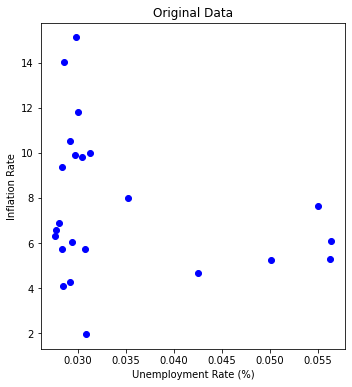

In [73]:
# Plotting the original data
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(df['Unemployment Rate (%)'], df['Inflation Rate'], c='b', label='Original Data')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Inflation Rate')
plt.title('Original Data')

In [74]:
import pandas as pd
from scipy import stats
# Drop non-numeric columns or select the numeric columns you want to calculate Z-scores for
numeric_columns = df.select_dtypes(include='number')

# Calculate Z-scores for numeric columns
z_scores = stats.zscore(numeric_columns)

# Define a Z-score threshold
z_score_threshold = 3

# Create a boolean mask to identify outliers in the original dataset
outliers_mask = (abs(z_scores) > z_score_threshold).any(axis=1)

# Filter your dataset to exclude outliers
df_no_outliers = df[~outliers_mask]

# Calculate Z-scores for the filtered dataset (df_no_outliers)
z_scores_filtered = stats.zscore(df_no_outliers.select_dtypes(include='number'))

# Check for remaining outliers in the filtered dataset
remaining_outliers_mask = (abs(z_scores_filtered) > z_score_threshold).any(axis=1)

# List the records with remaining outliers
remaining_outliers = df_no_outliers[remaining_outliers_mask]


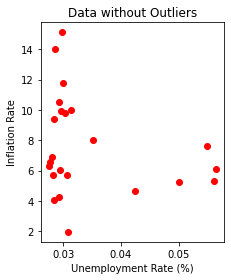

In [80]:
# Plotting the data after outlier removal
plt.subplot(121)
plt.scatter(df_no_outliers['Unemployment Rate (%)'], df_no_outliers['Inflation Rate'], c='r', label='Data without Outliers')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Inflation Rate')
plt.title('Data without Outliers')

plt.tight_layout()
plt.show()

# Feature Engineering

* Feature engineering for the dataset is important because what it simply does is to create menaingful features for machine learning. In this case for the dataset , we can have both economic and demographic indicators 